In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import LogNorm

from textblob.sentiments import NaiveBayesAnalyzer

import pandas as pd
import sqlite3
from textblob import TextBlob

import seaborn as sns
sns.set(color_codes=True)

# encoding=utf8
import sys
reload(sys)
sys.setdefaultencoding('utf8')

import spacy
nlp = spacy.load('en')

import re

In [53]:
df = pd.read_csv('../pitchfork2.csv')

# df['word_count'] = df['content'].str.count('\w+')
# df['adj_count'] = df['content_adj'].str.count('\w+')

# df['avg_word_length'] = df['content'].str.count('[^ ]') / df['word_count']
# df['adj_word_length'] = df['content_adj'].str.count('[^ ]') / df['content_adj'].str.count('\w+')
# df['adj_freq'] = df['adj_count'] / df['word_count']

In [3]:
years = np.arange(1999, 2018)
df_new = df[df['new_album'] == 1]
df_reissue = df[df['new_album'] == 0]

In [26]:
df_spot = pd.read_csv('spotifydata.csv')

In [27]:
df_spot['year'] = df_spot['album_release_year'].str[0:4].astype(int)

In [28]:
df_spot_grouped = df_spot.groupby(['artist', 'album_name']).mean()
df_spot_grouped.reset_index(inplace=True)
df_spot_grouped['title'] = df_spot_grouped['album_name'].str.lower()

In [29]:
df.drop(['num_years_since_release', 'year'], axis=1, inplace=True)

In [30]:
df_spot_grouped[df_spot_grouped['artist'] == 'shy glizzy']

,artist,album_name,album_popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,track_popularity,year,title
32116,shy glizzy,FTO,48.0,0.855500,0.613833,-6.138667,0.112225,0.136067,0.000000e+00,0.146892,0.489250,136.598750,212982.750000,4.000000,30.083333,2015.0,fto
32117,shy glizzy,LAW 3: Now Or Never,52.0,0.748353,0.726824,-5.195294,0.075588,0.068809,6.882353e-07,0.185424,0.436588,127.793353,228203.588235,4.000000,34.352941,2014.0,law 3: now or never
32118,shy glizzy,Quiet Storm,65.0,0.789000,0.652000,-5.243556,0.157678,0.084586,8.833333e-08,0.114372,0.443722,136.044167,208489.666667,4.055556,50.388889,2017.0,quiet storm
32119,shy glizzy,The World Is Yours,55.0,0.792125,0.657375,-5.935375,0.151087,0.089463,4.437500e-07,0.158500,0.560500,138.148375,197699.500000,4.000000,44.500000,2017.0,the world is yours
32120,shy glizzy,Young Jefe,58.0,0.798368,0.640421,-7.491895,0.218063,0.164347,1.054737e-06,0.218179,0.498474,129.811579,201402.105263,3.894737,33.368421,2014.0,young jefe
32121,shy glizzy,Young Jefe 2,53.0,0.796667,0.577750,-6.884250,0.199592,0.438142,0.000000e+00,0.147258,0.446417,127.060417,197373.750000,3.833333,39.000000,2016.0,young jefe 2


In [9]:
df.head()

,Unnamed: 0,index,reviewid,title,artist,url,score,best_new_music,best_new_reissue,author,...,abstract_adj,content_adj,cont_polarity,cont_subjectivity,abs_polarity,abs_subjectivity,word_count,adj_count,adj_freq,score_bin
0,0,22,5a3aa14cdea49a0a938ccb18,merry christmas lil mama: re-wrapped,"chance the rapper, jeremih",https://pitchfork.com/reviews/albums/merry-chr...,7.7,0,0,marc hogan,...,NaN,free brutal foreseeable beloved magnetic appro...,0.177744,0.537219,0.177744,0.537219,1389,124,0.089273,7
1,1,23,5a2eacf785030943c5158845,pressure,jeezy,https://pitchfork.com/reviews/albums/pressure/,6.3,0,0,sheldon pearce,...,effective new few,effective new few pusher recent high new socia...,0.059904,0.431901,0.059904,0.431901,895,63,0.070391,6
2,2,24,5a0a0f9fd5ec0a321fb119a2,the beautiful & damned,g-eazy,https://pitchfork.com/reviews/albums/g-eazy-th...,5.1,0,0,sheldon pearce,...,new boozy minor key possible,new boozy minor key possible Beautiful sociali...,-0.096061,0.704170,-0.096061,0.704170,993,87,0.087613,5
3,3,25,5a285f957d91d040cf1e35e1,quiet storm,shy glizzy,https://pitchfork.com/reviews/albums/shy-glizz...,7.1,0,0,jay balfour,...,deft soft,deft soft unexpected jumpy eager obvious favor...,0.132828,0.510859,0.132828,0.510859,653,50,0.076570,7
4,4,26,5a2eb9d5a31af72b3b598039,pop 2,charli xcx,https://pitchfork.com/reviews/albums/charli-xc...,8.4,1,0,meaghan garvey,...,eclectic romantic fun emotional,eclectic romantic fun emotional first robotic ...,0.098794,0.517791,0.098794,0.517791,1368,139,0.101608,8


In [54]:
df = df.merge(df_spot_grouped, how='left', on=['artist', 'title'])

In [62]:
df.fillna("None", inplace=True)

In [65]:
import difflib

In [68]:
df2 = df

In [69]:
df2.title = df_spot_grouped.title.map(lambda x: difflib.get_close_matches(x, df_spot_grouped.title)[0])

KeyboardInterrupt: 

In [70]:
df2

,Unnamed: 0,index,reviewid,title,artist,url,score,best_new_music,best_new_reissue,author,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,track_popularity,year_y
0,0,22,5a3aa14cdea49a0a938ccb18,merry christmas lil mama: re-wrapped,"chance the rapper, jeremih",https://pitchfork.com/reviews/albums/merry-chr...,7.7,0,0,marc hogan,...,None,None,None,None,None,None,None,None,None,None
1,1,23,5a2eacf785030943c5158845,pressure,jeezy,https://pitchfork.com/reviews/albums/pressure/,6.3,0,0,sheldon pearce,...,0.192508,0.0351299,0,0.238,0.339462,101.961,206000,4,60,2017
2,2,24,5a0a0f9fd5ec0a321fb119a2,the beautiful & damned,g-eazy,https://pitchfork.com/reviews/albums/g-eazy-th...,5.1,0,0,sheldon pearce,...,0.261135,0.129379,8.931e-06,0.20846,0.3333,106.805,223715,4,74.1,2017
3,3,25,5a285f957d91d040cf1e35e1,quiet storm,shy glizzy,https://pitchfork.com/reviews/albums/shy-glizz...,7.1,0,0,jay balfour,...,0.157678,0.0845856,8.83333e-08,0.114372,0.443722,136.044,208490,4.05556,50.3889,2017
4,4,26,5a2eb9d5a31af72b3b598039,pop 2,charli xcx,https://pitchfork.com/reviews/albums/charli-xc...,8.4,1,0,meaghan garvey,...,0.08503,0.18908,0.000141684,0.17668,0.39931,123.709,243255,4,61.3,2017
5,5,27,5a286409a31af72b3b597e77,a home on earth ep,the body,https://pitchfork.com/reviews/albums/the-body-...,7.2,0,0,andy o'connor,...,None,None,None,None,None,None,None,None,None,None
6,6,28,5a2eabf14166de2d9c719107,revival,eminem,https://pitchfork.com/reviews/albums/eminem-re...,5.0,0,0,matthew ismael ruiz,...,0.284247,0.268102,4.21289e-05,0.351163,0.518895,103.726,245555,4,70.6842,2017
7,7,29,5a29802a49e3044f38ff9ccb,the golden ravedays,superpitcher,https://pitchfork.com/reviews/albums/superpitc...,6.6,0,0,philip sherburne,...,None,None,None,None,None,None,None,None,None,None
8,8,30,5a33ece953679c58cfd0113d,no_one ever really dies,n.e.r.d.,https://pitchfork.com/reviews/albums/nerd-no-o...,6.2,0,0,jonah bromwich,...,None,None,None,None,None,None,None,None,None,None
9,9,31,5a282cb2460fd81ab41fc86e,finding shore,"tom rogerson, brian eno",https://pitchfork.com/reviews/albums/tom-roger...,8.0,0,0,robert ham,...,None,None,None,None,None,None,None,None,None,None


In [64]:
df[df['tempo'] == "None"]

,Unnamed: 0,index,reviewid,title,artist,url,score,best_new_music,best_new_reissue,author,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,track_popularity,year_y
0,0,22,5a3aa14cdea49a0a938ccb18,merry christmas lil mama: re-wrapped,"chance the rapper, jeremih",https://pitchfork.com/reviews/albums/merry-chr...,7.7,0,0,marc hogan,...,None,None,None,None,None,None,None,None,None,None
5,5,27,5a286409a31af72b3b597e77,a home on earth ep,the body,https://pitchfork.com/reviews/albums/the-body-...,7.2,0,0,andy o'connor,...,None,None,None,None,None,None,None,None,None,None
7,7,29,5a29802a49e3044f38ff9ccb,the golden ravedays,superpitcher,https://pitchfork.com/reviews/albums/superpitc...,6.6,0,0,philip sherburne,...,None,None,None,None,None,None,None,None,None,None
8,8,30,5a33ece953679c58cfd0113d,no_one ever really dies,n.e.r.d.,https://pitchfork.com/reviews/albums/nerd-no-o...,6.2,0,0,jonah bromwich,...,None,None,None,None,None,None,None,None,None,None
9,9,31,5a282cb2460fd81ab41fc86e,finding shore,"tom rogerson, brian eno",https://pitchfork.com/reviews/albums/tom-roger...,8.0,0,0,robert ham,...,None,None,None,None,None,None,None,None,None,None
11,11,33,5a28619b12b9202b45f92d9d,diggin in the carts: a collection of pioneerin...,various artists,https://pitchfork.com/reviews/albums/various-a...,7.5,0,0,daniel martin-mccormick,...,None,None,None,None,None,None,None,None,None,None
12,12,34,5a28604212b9202b45f92d9c,wyclef jean inspired by...,wyclef jean,https://pitchfork.com/reviews/albums/wyclef-je...,5.0,0,0,ian cohen,...,None,None,None,None,None,None,None,None,None,None
14,14,36,5a286696a31af72b3b597e79,fela kuti box set #4,fela kuti,https://pitchfork.com/reviews/albums/fela-kuti...,8.5,1,1,edwin stats houghton,...,None,None,None,None,None,None,None,None,None,None
15,15,37,5a1f1e528b03306d4a803792,bloodas,"tee grizzley, lil durk",https://pitchfork.com/reviews/albums/tee-grizz...,7.4,0,0,evan rytlewski,...,None,None,None,None,None,None,None,None,None,None
17,17,39,5a297d444166de2d9c718dc0,tribute to 2,jim james,https://pitchfork.com/reviews/albums/jim-james...,6.2,0,0,calum marsh,...,None,None,None,None,None,None,None,None,None,None


In [39]:
df['num_years_since_release'] = df['pub_year'] - df['year_y']

In [40]:
df.shape

(10461, 55)

In [12]:
df.groupby('year')['score'].count()

year
1900.0      1
1959.0      1
1960.0      1
1961.0      1
1964.0      1
1965.0      1
1967.0      2
1968.0      2
1969.0      3
1970.0      6
1971.0     10
1972.0      5
1973.0      5
1974.0      4
1975.0      6
1976.0      7
1977.0      4
1978.0      3
1979.0     11
1980.0     10
1981.0      7
1982.0      5
1983.0     11
1984.0      5
1985.0      8
1986.0      4
1987.0      5
1988.0     12
1989.0      7
1990.0      6
1991.0     11
1992.0     15
1993.0      6
1994.0     17
1995.0     14
1996.0     19
1997.0     14
1998.0     29
1999.0    115
2000.0    164
2001.0    275
2002.0    367
2003.0    417
2004.0    432
2005.0    521
2006.0    562
2007.0    633
2008.0    630
2009.0    616
2010.0    631
2011.0    627
2012.0    671
2013.0    720
2014.0    607
2015.0    681
2016.0    755
2017.0    755
2018.0      3
Name: score, dtype: int64

In [41]:
df[df['best_new_music'] == 1].groupby('pub_year')['album_popularity'].mean()

pub_year
2003    24.740741
2004    33.520000
2005    36.851852
2006    40.111111
2007    32.906250
2008    30.950000
2009    36.380952
2010    33.560000
2011    35.000000
2012    30.360000
2013    42.192308
2014    37.576923
2015    42.375000
2016    47.132075
2017    50.388889
Name: album_popularity, dtype: float64

In [43]:
df_2016 = df[df['pub_year'] == 2016]

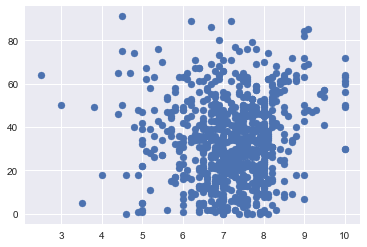

In [44]:
plt.scatter(df_2016['score'], df_2016['album_popularity'])

In [37]:
df.drop([u'genre_electronic', u'genre_experimental',
       u'genre_folk/country', u'genre_global', u'genre_jazz', u'genre_metal',
       u'genre_pop/r&b', u'genre_rap', u'genre_rock'], axis=1, inplace=True)


In [39]:
df.drop(['pub_weekday', 'year', 'pub_month'], axis=1, inplace=True)

In [45]:
df.drop([u'cont_polarity', u'cont_subjectivity', u'abs_polarity',
       u'abs_subjectivity', u'word_count', u'adj_count', u'adj_freq',
       u'score_bin', u'avg_word_length', u'adj_word_length', u'artist_y',
       u'album_name'], axis=1, inplace=True)

In [49]:
df.drop(['track_popularity'], axis=1, inplace=True)

ValueError: x and y must have same first dimension, but have shapes (19,) and (18,)

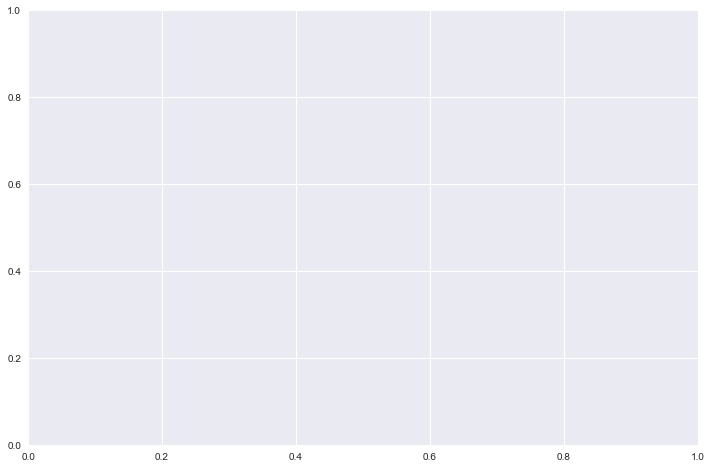

In [205]:
plt.figure(figsize=(12,8))
plt.plot(years, df[df['score'] > 9].groupby('pub_year')['valence'].mean())
plt.plot(years, df[df['score'] > 9].groupby('pub_year')['danceability'].mean())
# plt.plot(years, df[df['score'] > 9].groupby('pub_year')['liveness'].mean())
# plt.plot(years, df[df['score'] > 9].groupby('pub_year')['acousticness'].mean())
plt.plot(years, df[df['score'] > 9].groupby('pub_year')['energy'].mean())
plt.legend()
plt.show()

In [219]:
df[(df['instrumentalness'] > .6) & (df['energy'] < .4) & (df['score'] >= 8) & (df['content'].str.contains('ambient'))]

,Unnamed: 0,index,reviewid,title,artist,url,score,best_new_music,best_new_reissue,author,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,track_popularity,year,num_years_since_release
83,146,168,59f35307e68f6520a90c0afb,phantom brickworks,bibio,https://pitchfork.com/reviews/albums/bibio-pha...,8.2,0,0,andy beta,...,0.970111,0.869222,0.114567,0.108233,81.852556,4.885081e+05,4.222222,7.111111,2017.0,0.0
162,265,287,59c14dd09a887f6ba1bd7b02,new energy,four tet,https://pitchfork.com/reviews/albums/four-tet-...,8.0,0,0,andy beta,...,0.781571,0.723409,0.150829,0.287186,109.508929,2.419421e+05,3.785714,22.785714,2017.0,0.0
447,687,714,5929e802c0084474cd0c50fe,balsams,chuck johnson,https://pitchfork.com/reviews/albums/23275-chu...,8.1,0,0,marc masters,...,0.791667,0.895333,0.104083,0.079833,98.014167,4.135813e+05,3.000000,27.000000,2017.0,0.0
696,1064,1114,5929d8f013d197565213cc3d,no home of the mind,bing & ruth,https://pitchfork.com/reviews/albums/22888-bin...,8.2,0,0,mark richardson,...,0.921300,0.850300,0.103560,0.041340,75.969600,3.562898e+05,3.800000,36.300000,2017.0,0.0
698,1067,1117,5929d8ef0c2bba1b7de021ae,an act of love,earthen sea,https://pitchfork.com/reviews/albums/22896-ear...,8.1,0,0,andy beta,...,0.732875,0.823000,0.122088,0.196300,93.302000,2.887431e+05,3.750000,25.125000,2017.0,0.0
793,1240,1296,5929d9745e6ef959693247d9,clear sounds/perfetta,harry bertoia,https://pitchfork.com/reviews/albums/22715-cle...,8.0,0,0,marc masters,...,0.297000,0.730000,0.120000,0.025600,84.188000,1.020636e+06,4.000000,1.500000,2016.0,1.0
834,1320,1381,5929d9b00c2bba1b7de02263,what you get for being young,suzanne kraft,https://pitchfork.com/reviews/albums/22535-suz...,8.0,0,0,philip sherburne,...,0.587021,0.909429,0.153714,0.336429,104.257857,3.357420e+05,4.000000,15.571429,2016.0,0.0
1016,1585,1661,5929da7bd7a71d1ea5699be3,another green world,brian eno,https://pitchfork.com/reviews/albums/22061-ano...,10.0,0,0,mike powell,...,0.673429,0.622774,0.119800,0.354614,118.398429,1.753761e+05,3.642857,35.142857,1975.0,41.0
1031,1617,1696,5929da945e6ef959693248ef,goodbye to language,daniel lanois,https://pitchfork.com/reviews/albums/22289-goo...,8.1,0,0,philip sherburne,...,0.887250,0.856333,0.105883,0.047692,87.703417,1.838608e+05,3.416667,20.666667,2016.0,0.0
1146,1814,1902,5929db29c0084474cd0c4623,sketches from an island 2,mark barrott,https://pitchfork.com/reviews/albums/22062-ske...,8.0,0,0,andy beta,...,0.756556,0.908556,0.147800,0.391889,122.425667,2.919342e+05,4.000000,17.888889,2016.0,0.0


In [218]:
df[df['artist'].str.contains('william basinski')]

,Unnamed: 0,index,reviewid,title,artist,url,score,best_new_music,best_new_reissue,author,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,track_popularity,year,num_years_since_release
779,1210,1265,5929d96013d197565213cc9e,a shadow in time,william basinski,https://pitchfork.com/reviews/albums/22738-a-s...,7.9,0,0,daniel martin-mccormick,...,0.8220,0.880000,0.07090,0.25250,104.002000,1.299536e+06,4.5,29.500000,2017.0,0.0
1046,1640,1720,5929daa20c2bba1b7de0235b,92982,william basinski,https://pitchfork.com/reviews/albums/22277-wil...,8.7,1,1,kevin lozano,...,0.9640,0.899000,0.13685,0.04030,113.158000,9.412768e+05,4.0,24.750000,2009.0,7.0
2485,4405,4634,5929e318c0084474cd0c4e26,melancholia,william basinski,https://pitchfork.com/reviews/albums/19246-wil...,7.4,0,0,nick neyland,...,0.9825,0.872714,0.11095,0.07090,85.217357,1.999572e+05,3.5,30.357143,2003.0,11.0
2697,5323,5597,5929e5ba0c2bba1b7de02e5e,nocturnes,william basinski,https://pitchfork.com/reviews/albums/18282-wil...,7.5,0,0,nick neyland,...,0.9885,0.881500,0.09965,0.03735,103.076000,2.069500e+06,3.5,10.000000,2003.0,10.0
4456,17235,17939,5929d8960c2bba1b7de0214e,the river,william basinski,https://pitchfork.com/reviews/albums/576-the-r...,8.8,0,0,andy beta,...,0.5555,0.926500,0.36500,0.07825,78.214500,2.812614e+06,3.5,9.000000,2007.0,-4.0
